**This program is executed using Google colab**

## Library import


In [45]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## Checking configurations

In [46]:
tf.config.experimental.list_physical_devices()
# Checking the list of physical devices used by tensorflow

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [47]:
tf.test.is_built_with_cuda()

True

## Data import


[DATASET INFO](https://www.cs.toronto.edu/%7Ekriz/cifar.html)

In [48]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

## EDA(exploratory data analysis)


In [49]:
x_train.shape

(50000, 32, 32, 3)

50000 records  
32 x 32 dimension  
3 is color dimension like RGB

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
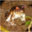

In [50]:
x_train[0]

In [51]:
x_train[0].shape

(32, 32, 3)

In [52]:
y_train[0]

array([6], dtype=uint8)

In [53]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[index])

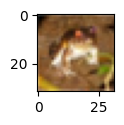

In [54]:
plot_sample(0)

In [55]:
classes  = ['airplane','automobile','bird','cat','deer','dog',
            'frog','horse','ship','truck']

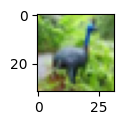

In [56]:
plot_sample(6)

In [57]:
y_train[6]

array([2], dtype=uint8)

In [58]:
classes[y_train[6][0]]

'bird'

In [59]:
x_train = x_train/255
x_test = x_test/255

## One Hot Encoding NN

In [60]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [61]:
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes = 10
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [62]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes = 10
)

## Model Building

In [63]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(3000,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train_categorical,epochs = 1)
# THIS LAPTOP IS RUNNING WITH CPU ONLY SO I PUT 1 EPOCHS... THE OPTIMAL ACCURACY WILL BE ON EPOCHS = 50

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 202s 128ms/step - accuracy: 0.3076 - loss: 1.9301


In [65]:
model.predict(x_test)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step


array([0.45116806, 0.454289  , 0.6900033 , 0.7717305 , 0.56655204,
       0.7179712 , 0.6634383 , 0.14992188, 0.5119375 , 0.10582934],
      dtype=float32)

In [66]:
np.argmax(model.predict(x_test)[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step


np.int64(3)

In [68]:
y_test[0]

array([3], dtype=uint8)

## MEASURE THE TIEM OF CPU

In [70]:
def get_model():
    model = keras.Sequential([
            keras.layers.Flatten(input_shape=(32,32,3)),
            keras.layers.Dense(3000, activation='relu'),
            keras.layers.Dense(1000, activation='relu'),
            keras.layers.Dense(10, activation='sigmoid')
        ])

    model.compile(optimizer='SGD',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [72]:
with tf.device('/CPU:0'): # for gpu ('/GPU:0')
    cpu_model = get_model()
    cpu_model.fit(x_train, y_train_categorical, epochs=1)
    # 1:56 MINUTE

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.3059 - loss: 1.9302
